In [17]:
#import necessary python modules
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import binarize

In [18]:
#load spam data
matObject = loadmat('spamData.mat')

In [19]:
#read original arrays from .mat file
xTrainOrig = matObject['Xtrain']
yTrainOrig = matObject['ytrain']
xTestOrig = matObject['Xtest']
yTestOrig = matObject['ytest']

In [20]:
#binarize feature data
xTrainBin = binarize(xTrainOrig)
xTestBin = binarize(xTestOrig)

In [21]:
#flatten the label data
yTrainFlat = yTrainOrig.flatten()
yTestFlat = yTestOrig.flatten()

In [22]:
#Test the implementation with minimum data
#xTrainBin = xTrainBin[0:1000]
#yTrainFlat = yTrainFlat[0:1000]

alphas = np.arange(0,100.5,0.5)

In [23]:
xTrainBin

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [24]:
yTrainFlat

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [25]:
labels = [0,1]
training_results = []
test_results = []
train_accuracy = []
test_accuracy = []

In [26]:
def calculateML(label):
    return np.log(list(yTrainFlat).count(label)/len(yTrainFlat))

def calculateFL(index,feature,alpha,label,FL,labelCount):
    tempCal = ( (FL[index]+alpha) / (labelCount + (alpha*2)) )  
    if(feature == 1):
        return np.log(tempCal)
    else:
        return np.log(1 - tempCal)

In [27]:
def classify(row,alpha):
    probList = []
    for labelIndex,label in enumerate(labels):
        probLabel = lambdaLabels[labelIndex]
        FL = FL_list[labelIndex]
        labelCount = labelCounts[labelIndex]
        for index, feature in enumerate(row):
            probLabel += calculateFL(index,feature,alpha,label,FL,labelCount)
        probList.append(probLabel)
    #print(probList)
    return (labels[probList.index(max(probList))])

In [28]:
FL_list = []
lambdaLabels = []
labelCounts = []
for labelIndex,label in enumerate(labels):
    FL_list.append(xTrainBin[yTrainFlat==label].sum(axis=0))
    lambdaLabels.append(calculateML(label))
    labelCounts.append(list(yTrainFlat).count(label))
    

for alphaIndex, alpha in enumerate(alphas):
    print (alphaIndex)
    training_results = []
    test_results = []

    for index,row in enumerate(xTrainBin):
        training_results.append(classify(row,alpha))
        #print (index)
    training_results = np.asarray(training_results)
    train_accuracy.append(np.sum(yTrainFlat == training_results))

    for index,row in enumerate(xTestBin):
        test_results.append(classify(row,alpha))
        #print (index)
    test_results = np.asarray(test_results)
    test_accuracy.append(np.sum(yTestFlat == test_results))       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [29]:
totalTrainMails = len(yTrainFlat)
train_accuracy[:] = [(1-x/totalTrainMails)*100 for x in train_accuracy]

totalTestMails = len(yTestFlat)
test_accuracy[:] = [(1-x/totalTestMails)*100 for x in test_accuracy]



In [30]:
train_accuracy

[11.321370309951062,
 11.386623164763455,
 11.419249592169656,
 11.419249592169656,
 11.451876019575858,
 11.451876019575858,
 11.48450244698206,
 11.517128874388249,
 11.582381729200652,
 11.647634584013055,
 11.680261011419246,
 11.712887438825447,
 11.712887438825447,
 11.712887438825447,
 11.712887438825447,
 11.680261011419246,
 11.712887438825447,
 11.712887438825447,
 11.712887438825447,
 11.745513866231649,
 11.745513866231649,
 11.745513866231649,
 11.77814029363785,
 11.77814029363785,
 11.77814029363785,
 11.77814029363785,
 11.810766721044041,
 11.810766721044041,
 11.810766721044041,
 11.876019575856445,
 11.876019575856445,
 11.876019575856445,
 11.941272430668837,
 11.941272430668837,
 12.00652528548124,
 12.00652528548124,
 12.039151712887442,
 12.071778140293643,
 12.104404567699834,
 12.137030995106034,
 12.137030995106034,
 12.137030995106034,
 12.071778140293643,
 12.104404567699834,
 12.104404567699834,
 12.104404567699834,
 12.137030995106034,
 12.137030995106034,

In [31]:
test_accuracy

[12.044270833333337,
 12.174479166666663,
 12.369791666666663,
 12.434895833333337,
 12.5,
 12.565104166666663,
 12.565104166666663,
 12.6953125,
 12.630208333333337,
 12.630208333333337,
 12.6953125,
 12.565104166666663,
 12.565104166666663,
 12.565104166666663,
 12.565104166666663,
 12.565104166666663,
 12.565104166666663,
 12.565104166666663,
 12.6953125,
 12.6953125,
 12.6953125,
 12.760416666666663,
 12.760416666666663,
 12.760416666666663,
 12.760416666666663,
 12.760416666666663,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.825520833333337,
 12.890625,
 12.955729166666663,
 12.955729166666663,
 12.955729166666663,
 13.020833333333337,
 13.216145833333337,
 13.216145833333337,
 13.216145833333337,
 13.28125,
 13.346354166666663,
 13.346354166666663,
 13.346354166666663,
 13.28125,
 13.346354166666663,
 13.346354166666663,
 13.346354166666663,
 13.346354166666663,
 13.34635416

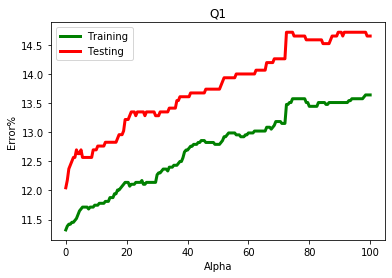

In [35]:
plt.plot(alphas,train_accuracy,'g',label='Training', linewidth=3)
plt.plot(alphas,test_accuracy,'r',label='Testing', linewidth=3)
plt.title('Q1')
plt.ylabel('Error %')
plt.xlabel('Alpha')
plt.legend()
plt.show()